In [ ]:
!pwd
############# The DATASET is available here https://www.kaggle.com/rahulmakwana/american-sign-language-recognition
from google.colab import drive
drive.mount("/content/drive/")
!unzip "drive/MyDrive/archive"

Streaming output truncated to the last 5000 lines.
  inflating: training_set/best of luck/632.png  
  inflating: training_set/best of luck/633.png  
  inflating: training_set/best of luck/634.png  
  inflating: training_set/best of luck/635.png  
  inflating: training_set/best of luck/636.png  
  inflating: training_set/best of luck/637.png  
  inflating: training_set/best of luck/638.png  
  inflating: training_set/best of luck/639.png  
  inflating: training_set/best of luck/64.png  
  inflating: training_set/best of luck/640.png  
  inflating: training_set/best of luck/641.png  
  inflating: training_set/best of luck/642.png  
  inflating: training_set/best of luck/643.png  
  inflating: training_set/best of luck/644.png  
  inflating: training_set/best of luck/645.png  
  inflating: training_set/best of luck/646.png  
  inflating: training_set/best of luck/647.png  
  inflating: training_set/best of luck/648.png  
  inflating: training_set/best of luck/649.png  
  inflating: traini

In [ ]:
import os 
train_dir="training_set"
test_dir="test_set"
folders=[folder for folder in sorted(os.listdir(train_dir)) ]#if folder!='fuck you']
print(folders)
print("Total no. of folders are: ",len(folders))

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']
Total no. of folders are:  40


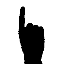

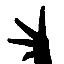

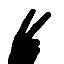

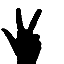

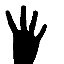

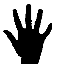

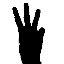

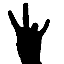

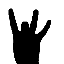

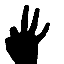

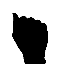

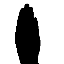

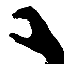

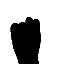

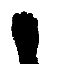

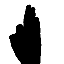

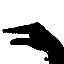

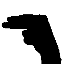

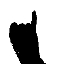

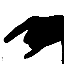

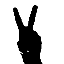

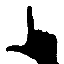

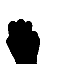

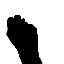

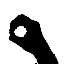

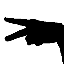

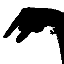

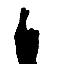

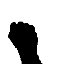

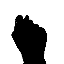

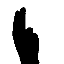

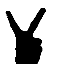

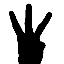

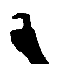

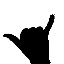

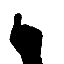

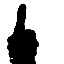

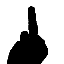

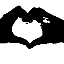

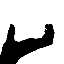

In [ ]:
from IPython.display import Image 
count=0
for folder in folders:
    count=0
    folder_path=os.path.join(train_dir,folder)
    for image in os.listdir(folder_path):
        image_path=os.path.join(folder_path,image)
        pil_img = Image(filename=image_path)
        display(pil_img)
        count+=1
        break

In [ ]:
import cv2
import numpy as np
y=load_data(train_dir)
print('There are total {} unique Labels in the dataset.'.format(len(np.unique(y))))

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder 
trainset = ImageFolder((train_dir),
                           transform=transforms.Compose([
    transforms.ToTensor()]))
trains,tests=train_test_split(trainset,test_size=0.2)


In [ ]:
train = torch.utils.data.DataLoader(
   ( trains) ,batch_size=1, shuffle=True, num_workers=0, pin_memory=False)
test = torch.utils.data.DataLoader(
   ( tests) ,batch_size=1, shuffle=True, num_workers=0, pin_memory=False)



In [ ]:
# Train the model over one epoch

import torch
import torch.nn as nn
import torch.nn.functional as F
correct_classifications=0

class MNIST_CNN( torch.nn.Module ):
  # Constructor
  def __init__(self):
   super().__init__()
   self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(64 * 64 * 3, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.BatchNorm1d(32),
      nn.ReLU(),
      nn.Linear(32, 40)
    )

  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

In [ ]:
model = MNIST_CNN().cuda()

import torchvision.transforms as transforms

import time
batch_idx=0
start_time = time.perf_counter_ns()
loss_function       = torch.nn.CrossEntropyLoss()
learning_technique	= torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
tot_loss=0
running_loss=0

# Do one training pass over the entire dataset


In [ ]:

start_time = time.perf_counter_ns()
for epoch in range(3):
  e=enumerate(train)
  correct_classifications = 0
  current_loss=0
  for i in range (int (len(train)/10)):
    CUDA_LAUNCH_BLOCKING = "1"
    batchIndex, (image, label) = next( e )
    # print(image.shape,label)
    image=image.cuda()
    label=label.cuda()
  
    # print("batch,label,imshape",batchIndex,label, image.shape)
    #image=torch.reshape(image, (28, 28))
    
    output=model(image).cuda()
    # print("argmax,lable",torch.argmax( output ),label)
    # print("op and lab shape",output.shape,label.shape)
    # print(type(output))
    loss = loss_function(output, (label))
    learning_technique.zero_grad()
    loss.backward()
    learning_technique.step()
    classification = torch.argmax( output,dim=1 )
    print("the predicted class is {} and the ground truth is {}".format(classification.cpu(),label.cpu()))
    correct_classifications=torch.sum((classification.cpu()==label.cpu()))+correct_classifications
    # if (classification.cpu()==label.cpu()):
    #   correct_classifications += 1
    batch_idx+=1
    current_loss += loss.item()
    if i % 500 == 499:
            print('Loss after mini-batch %5d: %.3f' %
                  (i + 1, current_loss / 500))
            current_loss = 0.0
                    
elapsed_time = ( time.perf_counter_ns() - start_time ) / 1000000000
print("Full-Training : {}/{} Correct Predictions took {} seconds".format(correct_classifications, len(train),elapsed_time))
 
# Iterate over 500 images to test training results
# Create an enumerable object to iterate over the input and labelled images
start_time = time.perf_counter_ns()
torch.save( model.state_dict(), "partially_trained_model.pt" )


In [ ]:
e=enumerate(test)
correct_classifications=0
current_loss=0
with torch.no_grad():
  correct_classifications = 0
  for k in range(int(len(test)/10)):
    # Get input image and label pairs
    batchIndex, (image, label) = next( e )
    image=image.cuda()
    label=label.cuda()
    # Pass through the network
    output=model(image).cuda()
    loss = loss_function(output, (label))
   
    classification = torch.argmax( output,dim=1 )
    print("the predicted class is {} and the ground truth is {}".format(classification.cpu(),label.cpu()))
    correct_classifications=torch.sum((classification.cpu()==label.cpu()))+correct_classifications
    # if (classification.cpu()==label.cpu()):
    #   correct_classifications += 1
    batch_idx+=1
    current_loss += loss.item()
    if i % 50 == 49:
            print('Loss after mini-batch %5d: %.3f' %
                  (i + 1, current_loss / 50))
            current_loss = 0.0

# Use .item() to print the number of correct classifications a normal python integer rather than a tensor
print("Post-Training: {}/{} Correct Predictions, took {} seconds to train".format(correct_classifications.item(),len(test) ,elapsed_time))
print("training and testing took a total time in seconds of",elapsed_time)
# Save the trained model


In [ ]:
 def labeler(label):
            file=None
            if label==0:
              file='A'
            elif label==1:
              file='B'
            elif label==2:
              file='C'
            elif label==3:
             file='D'
                
            elif label==4:
             file='E'
               
            elif label==5:
             file='F'
               
            elif label==6:
             file='G'
                
            elif label==7:
              file='H'
                
            elif label==8:
              file='I'
                
            elif label==9:
              file='J'
              
            elif label==10:
              file='K'
                
            elif label==11:
              file='L'
                
            elif label==12:
              file='M'
                
            elif label==13:
              file='N'
            elif label==14:
              file='O'
                
            elif label==15:
              file='P'
                
            elif label==16:
              file='Q'
                
            elif label==17:
              file='R'
                
            elif label==18:
              file='S'
                
            elif  label==19:
              file='T'
               
            elif label==20:
              file='U'
                
            elif label==21:
              file='V'
                
            elif label==22:
              file='W'
                
            elif label==23:
              file='X'
                
            elif label==24:
              file='Y'
                
            elif label==25:
              file='Z'
                
            elif label==26:
              file='1'
                
            elif label==27:
              file='2'
                
            elif label==28:
              file='3'
            elif label==29:
             file='4'
                
            elif label==30:
              file='5'
                
            elif label==31:
              file='6'
                
            elif label==32:
             file='7'
                
            elif label==33:
             file='8'
                
            elif label==34:
              file='9'
                
            elif label==35:
              file='10'
                
            elif label==36:
              file=='best of luck'
                
            elif label==37:
              file='i love you'
                
            elif label==38:
              file='space'
                
            elif label==39:
              file='fuck you'
            return file
                

In [ ]:
import matplotlib.pyplot as plt
to_pil = transforms.ToPILImage()
for i in range(10):
  img = to_pil(image[i])
  labels=labeler(label[i].data)
  classed=labeler(classification[i].data)
  print("The gound truth labels are {} and the predicted labels are {}".format(labels,classed))
  plt.imshow(img)
  plt.show()